In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

<AxesSubplot:>

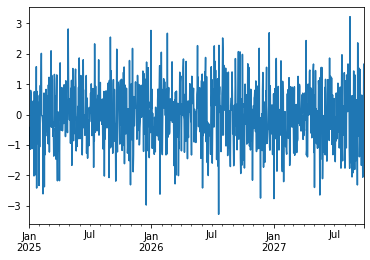

In [2]:
s = pd.Series(np.random.randn(1000),
             index = pd.date_range('1/1/2025',periods = 1000))
s.plot()

In [7]:
s

2025-01-01    -0.500870
2025-01-02    -0.920152
2025-01-03    -1.996833
2025-01-04    -2.646377
2025-01-05    -3.783550
                ...    
2027-09-23   -34.206521
2027-09-24   -36.263626
2027-09-25   -37.850038
2027-09-26   -39.066627
2027-09-27   -37.408389
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

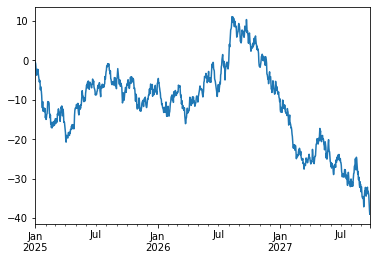

In [3]:
s = s.cumsum() # 누적합
s.plot()

In [4]:
# rolling : 이동평균 구할 때 사용
r = s.rolling(window = 30)
r

# window: size of moving window

Rolling [window=30,center=False,axis=0]

In [8]:
r.mean()

2025-01-01          NaN
2025-01-02          NaN
2025-01-03          NaN
2025-01-04          NaN
2025-01-05          NaN
                ...    
2027-09-23   -33.281177
2027-09-24   -33.500965
2027-09-25   -33.709920
2027-09-26   -33.937322
2027-09-27   -34.157341
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

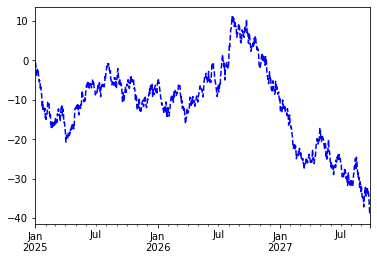

In [9]:
# 이동평균
s.plot(style = 'b--')

<AxesSubplot:>

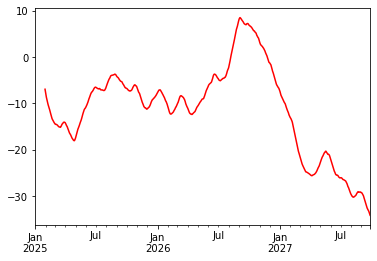

In [11]:
# 이동평균
r.mean().plot(style = 'r')

<AxesSubplot:>

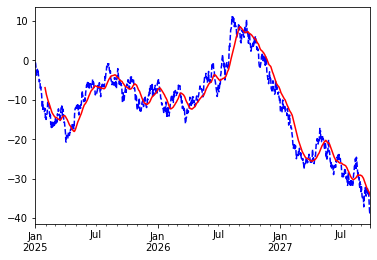

In [12]:
# 이동평균
s.plot(style = 'b--')
r.mean().plot(style = 'r')

In [20]:
# expanding
df = pd.DataFrame(np.random.randn(1000, 4),
                 index = pd.date_range('1/1/2015', periods = 1000),
                 columns = ['A','B','C','D'])

In [21]:
df = df.cumsum()
df

,A,B,C,D
2015-01-01,0.668723,-0.033960,0.266805,0.931886
2015-01-02,0.432642,-0.556687,-0.372995,1.027507
2015-01-03,-0.849513,0.042672,-1.880017,1.557225
2015-01-04,-0.146239,-0.155962,-3.070657,0.869655
2015-01-05,-0.250878,-0.486525,-2.815207,0.341745
...,...,...,...,...
2017-09-22,-21.018954,-1.088653,6.696824,3.822929
2017-09-23,-22.017349,-1.037625,4.813315,3.992532
2017-09-24,-22.281642,-0.830572,4.601153,3.992431
2017-09-25,-21.260119,0.276394,4.227018,3.211994


<AxesSubplot:>

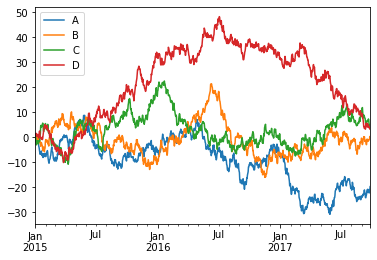

In [22]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

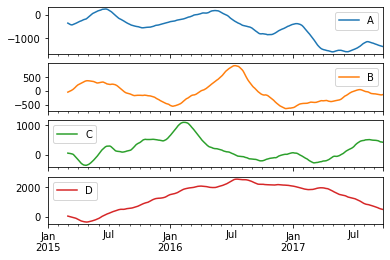

In [23]:
df.rolling(window = 60).sum().plot(subplots = True)

<AxesSubplot:>

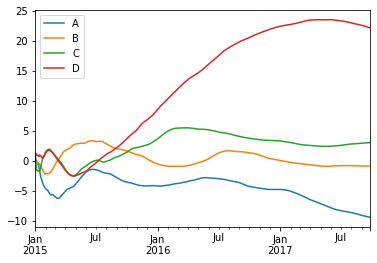

In [24]:
df.rolling(window = len(df), min_periods = 1).mean().plot()
# min_periods : int, default 1
# Minimum number of observations in window required to have a value

In [25]:
df.expanding?
# Provides expanding transformations(확장된 변형 제공)
# 누적된 변경된 값의 정보 제공

In [26]:
df.expanding(cmin_periods = 1).mean()

,A,B,C,D
2015-01-01,0.668723,-0.033960,0.266805,0.931886
2015-01-02,0.550683,-0.295324,-0.053095,0.979696
2015-01-03,0.083951,-0.182658,-0.662069,1.172206
2015-01-04,0.026403,-0.175984,-1.264216,1.096568
2015-01-05,-0.029053,-0.238092,-1.574414,0.945604
...,...,...,...,...
2017-09-22,-9.395902,-0.907006,3.008583,22.210507
2017-09-23,-9.408562,-0.907137,3.010393,22.192234
2017-09-24,-9.421460,-0.907060,3.011987,22.173998
2017-09-25,-9.433311,-0.905875,3.013203,22.155017


<AxesSubplot:>

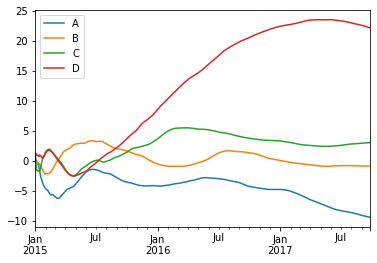

In [27]:
df.expanding(min_periods = 1).mean().plot()

In [28]:
dfe = pd.DataFrame({'B':[0,1,2,np.nan,4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

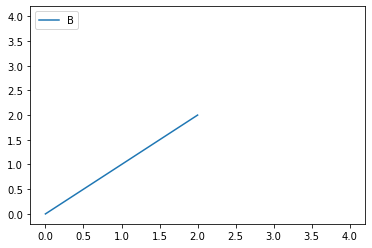

In [29]:
dfe.plot()

In [31]:
dfe.expanding(2)

Expanding [min_periods=2,center=False,axis=0]

In [30]:
dfe.expanding(2).sum() # 누적합

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

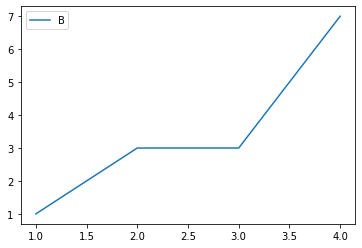

In [32]:
dfe.expandincg(2).sum().plot()

<AxesSubplot:>

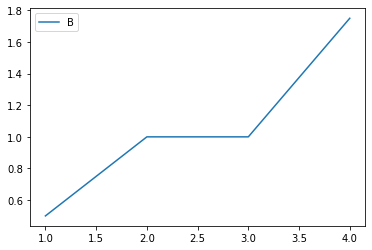

In [33]:
dfe.expanding(2).mean().plot()